# Part - 2 Exploratory Data 

Performing Exploratory Data Analysis from the dataset available at https://github.com/LuisM78/Appliances-energy-prediction-data using the following libraries :- 
1. Plotly
2. Matplotlib
3. Seaborn

## Summary

<h5>We explored the data using the following libraries:-</h5>
1. MissingNo - which gives the missing values in our dataset
2. Pivottablejs - Drag and drop Pivot Tables and Charts to understand the dataset 
3. PandasProfiling - It generates profile report and gives the summary 
4. ipythonwidgets.interact - Automatically creating UI interface which gives controls for exploring code and data interactively
5. Logging - To log all the files


<h5>Generated Extra features:-</h5>
1. NSM - Number of Seconds from Midnight
2. WeekDay - Monday to Sunday
3. WeekDayType - WeekDay or Weekend
4. TimeDelta - Represents a duration between two dates or times 


<h6>Plotted Graps of the following:-</h6>
1. Monthly Average Temperature
2. Monthly Average Humidity
3. Monthly Energy Consumption
4. Hourly Energy Consumption
5. The function day_visual() shows the relation between any two parameters of a particular day in a month
6. The function month_visual shows the relation between any two parameters of a particual month
7. The function month_visual shows the relation between any two parameters of a particual month

Analysed the correlation using day_visual() and month_visual()
Detected the outliers using Boxplot

Generated the summary using PandasProfiling

## Importing Libraries

In [70]:

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import plotly.plotly as py
from plotly.graph_objs import *
from matplotlib.pyplot import GridSpec
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import make_blobs
import missingno as msno
import pivottablejs
import pandas_profiling
import logging

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

For Logging, used logging.basicConfig, which will log all the records with time

In [71]:
logfilename = 'log_EnergyConsumption.txt'
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')

logging.debug('Loading Data into Dataframe')
try :  
    data= pd.read_csv("./Dataset/energydata_complete.csv")
    
except :
    logging.ERROR('Data logging failed')

### Load Data

In [72]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<h2>Variable Description</h2>

<ul>
	<li>date time year-month-day hour:minute:second&nbsp;</li>
	<li>Appliances, energy use in Wh</li>
	<li>lights, energy use of light fixtures in the house in Wh</li>
	<li>T1, Temperature in kitchen area, in Celsius</li>
	<li>RH_1, Humidity in kitchen area, in %</li>
	<li>T2, Temperature in living room area, in Celsius</li>
	<li>RH_2, Humidity in living room area, in %</li>
	<li>T3, Temperature in laundry room area</li>
	<li>RH_3, Humidity in laundry room area, in %</li>
	<li>T4, Temperature in office room, in Celsius</li>
	<li>RH_4, Humidity in office room, in %</li>
	<li>T5, Temperature in bathroom, in Celsius</li>
	<li>RH_5, Humidity in bathroom, in %</li>
	<li>T6, Temperature outside the building (north side), in Celsius</li>
	<li>RH_6, Humidity outside the building (north side), in %</li>
	<li>T7, Temperature in ironing room , in Celsius</li>
	<li>RH_7, Humidity in ironing room, in %</li>
	<li>T8, Temperature in teenager room 2, in Celsius</li>
	<li>RH_8, Humidity in teenager room 2, in %</li>
	<li>T9, Temperature in parents room, in Celsius</li>
	<li>RH_9, Humidity in parents room, in %</li>
	<li>To, Temperature outside (from Chi&egrave;vres weather station), in Celsius</li>
	<li>Pressure (from Chi&egrave;vres weather station), in mm Hg</li>
	<li>RH_out, Humidity outside (from Chi&egrave;vres weather station), in %</li>
	<li>Windspeed (from Chi&egrave;vres weather station), in m/s</li>
	<li>Visibility (from Chi&egrave;vres weather station), in km</li>
	<li>Tdewpoint (from Chi&egrave;vres weather station), &deg;C</li>
	<li>rv1, Random variable 1, nondimensional</li>
	<li>rv2, Rnadom variable 2, nondimensional</li>
</ul>

<p>Where indicated, data from the nearest airport weather station (Chi&egrave;vres Airport, Belgium) was downloaded from a public data set from&nbsp;</p>

<p>Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.<br />
&nbsp;</p>


<p><img alt="" src="./images/First Floor_dimensions removed.png" /></p>

<p><img alt="" src="./images/Second Floor_lines removed.png" /></p>


In [73]:
# This method tells us the structure of our dataframe
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [74]:
#It will give the number of rows and columns in a dataset
data.shape 

(19735, 29)

#### Added Number of Seconds From Midnight column 

In [75]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Added Number of Seconds From Midnight column ')

try :
    data['NSM'] = pd.to_datetime(data['date'])
    (data['NSM'].dt.hour*60 + data['NSM'].dt.minute)*60 + data['NSM'].dt.second
    
except :
    logging.ERROR('Addition of midnight column failed')

In [76]:
data.shape

(19735, 30)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [78]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Number of Null values')

try :
    data.isnull().sum()
    
except :
    logging.ERROR("can't show Null values, it failed")  

isnull().sum() tells the number of missing values

In [79]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
dtype: int64

There is NO missing values in our dataset

In [80]:
# It gives the total number of counts of a particular value
data.T1.value_counts()

21.000000    514
21.390000    484
21.200000    481
21.500000    458
21.290000    455
20.890000    435
21.100000    422
22.200000    411
21.890000    407
22.000000    401
21.790000    400
20.790000    398
22.100000    391
21.700000    383
21.600000    365
20.700000    301
22.390000    300
22.600000    296
22.500000    294
22.290000    289
22.890000    289
22.700000    287
20.600000    275
22.790000    274
23.000000    246
20.000000    244
20.100000    231
19.890000    211
20.500000    201
20.200000    198
            ... 
24.703636      1
25.760000      1
20.620000      1
24.464935      1
24.102597      1
24.426364      1
23.798701      1
18.767500      1
23.833766      1
24.771818      1
23.521714      1
23.716883      1
24.114286      1
24.676364      1
24.553636      1
23.840000      1
17.763333      1
25.525000      1
24.348052      1
23.763333      1
24.839571      1
23.675000      1
24.485455      1
24.690000      1
24.735455      1
24.594545      1
24.708182      1
24.753636     

In [81]:
all_columns = data.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'NSM']

In [82]:
data['Appliances'].nunique()

92

In [83]:
data_date = data["date"]
print("First Date time of Observation : ",data_date[0])
print("Last Date time of Observation : ",data_date.iloc[-1])

First Date time of Observation :  2016-01-11 17:00:00
Last Date time of Observation :  2016-05-27 18:00:00


The dataset contains data of 5 months(Jan - May) in 2016

In [84]:
# Convert argument to datetime, used to_datetime()
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

##### Calculating the time from date

In [85]:
data["date"].map(lambda x: x.time())

0        17:00:00
1        17:10:00
2        17:20:00
3        17:30:00
4        17:40:00
5        17:50:00
6        18:00:00
7        18:10:00
8        18:20:00
9        18:30:00
10       18:40:00
11       18:50:00
12       19:00:00
13       19:10:00
14       19:20:00
15       19:30:00
16       19:40:00
17       19:50:00
18       20:00:00
19       20:10:00
20       20:20:00
21       20:30:00
22       20:40:00
23       20:50:00
24       21:00:00
25       21:10:00
26       21:20:00
27       21:30:00
28       21:40:00
29       21:50:00
           ...   
19705    13:10:00
19706    13:20:00
19707    13:30:00
19708    13:40:00
19709    13:50:00
19710    14:00:00
19711    14:10:00
19712    14:20:00
19713    14:30:00
19714    14:40:00
19715    14:50:00
19716    15:00:00
19717    15:10:00
19718    15:20:00
19719    15:30:00
19720    15:40:00
19721    15:50:00
19722    16:00:00
19723    16:10:00
19724    16:20:00
19725    16:30:00
19726    16:40:00
19727    16:50:00
19728    17:00:00
19729    1

##### Generated the column weekday  

In [86]:
def dayoftheweek(day):
    if(day==0):
        return("Monday")
    if(day==1):
        return("Tuesday")
    if(day==2):
        return("Wednesday")
    if(day==3):
        return("Thurday")
    if(day==4):
        return("Friday")
    if(day==5):
        return("Saturday")
    if(day==6):
        return("Sunday")

In [87]:
data["dayoftheweek"] = data['date']
data["dayoftheweek"] = data['dayoftheweek'].apply(lambda x: dayoftheweek(x.dayofweek))
data.groupby('dayoftheweek').count()["date"]
data.head

<bound method NDFrame.head of                      date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
5     2016-01-11 17:50:00          50      40  19.890000  46.026667   
6     2016-01-11 18:00:00          60      50  19.890000  45.766667   
7     2016-01-11 18:10:00          60      50  19.856667  45.560000   
8     2016-01-11 18:20:00          60      40  19.790000  45.597500   
9     2016-01-11 18:30:00          70      40  19.856667  46.090000   
10    2016-01-11 18:40:00         230      70  19.926667  45.863333   
11    2016-01-11 18:50:00         580      60  20.066667  46.396667   
12    2016-01-11 19:00:00         430      50  

##### Generated WeekDayType Column

In [88]:
def weekdaytype(day):
    if(day=="Saturday" or day == "Sunday"):
        return "weekend"
    else:
        return "Weekday"

In [89]:
data["WeekDayType"] = data["dayoftheweek"]
data["WeekDayType"] = data['WeekDayType'].apply(lambda x: weekdaytype(x))
data.groupby('WeekDayType').count()["date"]

WeekDayType
Weekday    14263
weekend     5472
Name: date, dtype: int64

In [90]:
years = data["date"].map(lambda x : x.year)
years_indata = years.unique()
print(years_indata)

[2016]


In [91]:
months = data["date"].map(lambda x: x.month)
months_indata = months.unique()
print(months_indata)

[1 2 3 4 5]


In [92]:
data["TimeDelta"] = (data["date"]-data["date"].shift()).fillna(0)

In [93]:
data.groupby('TimeDelta').count()["date"]

TimeDelta
00:00:00        1
00:10:00    19734
Name: date, dtype: int64

In [94]:
t = np.arange(0.0,1.0,0.01)

In [95]:
data["date"][0].month

1

In [96]:
#no. of years
years = data["date"].apply(lambda x: x.year)
years_indata = years.unique()
years_indata

array([2016], dtype=int64)

In [97]:
#no. of months
months = data["date"].apply(lambda x: x.month)
months_indata = months.unique()
months_indata

array([1, 2, 3, 4, 5], dtype=int64)

In [98]:
#no. of hours
hours = data['date'].apply(lambda x : x.hour)
hours_indata = hours.unique()
hours_indata

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [99]:
data_new = data.copy()
data_new.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,dayoftheweek,WeekDayType,TimeDelta
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,Monday,Weekday,00:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,Monday,Weekday,00:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,Monday,Weekday,00:10:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,Monday,Weekday,00:10:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,Monday,Weekday,00:10:00


In [100]:
# Added Months and Hour column in dataframe
data_new['months'] = data_new['date'].apply(lambda x : x.month)
data_new['hour'] = data_new['date'].apply(lambda x : x.hour)

In [101]:
def hourlyEnergyData(hour):
    energy_data_Total_per_hour = data_new[(data_new['date'].map(lambda x: x.hour) == hour) ]
    print(energy_data_Total_per_hour['Appliances'].sum())

In [102]:
def monthlyEnergyData(month):
    energy_data_Total_per_month =data_new[(data_new['date'].map(lambda x: x.month) == month) ]
    print(energy_data_Total_per_month['Appliances'].sum())

In [103]:
def dayEnergyData(day):
    energy_data_Total_per_day = data_new[(data_new['date'].map(lambda x: x.day) == day) ]
    print(energy_data_Total_per_day['Appliances'].sum())

In [104]:
data_new.shape

(19735, 35)

In [105]:
data_new.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,NSM,dayoftheweek,WeekDayType,TimeDelta,months,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,Monday,Weekday,00:00:00,1,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,Monday,Weekday,00:10:00,1,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,Monday,Weekday,00:10:00,1,17
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,Monday,Weekday,00:10:00,1,17
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,Monday,Weekday,00:10:00,1,17


### Average of the total temperature was highest in the month of May 

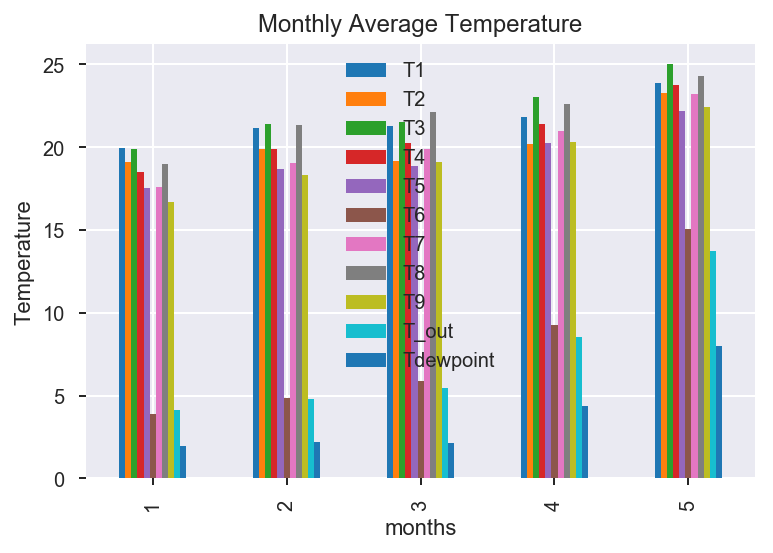

In [106]:
temp = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Tdewpoint']
df = data_new.groupby(['months'])[temp].mean()
df.plot.bar()
plt.ylabel('Temperature')
plt.title("Monthly Average Temperature")
plt.savefig("./Result/"+"Monthly Average Temperature.png")  

### Average of Overall Humidity was highest in the month of January

In [107]:
humidity = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']

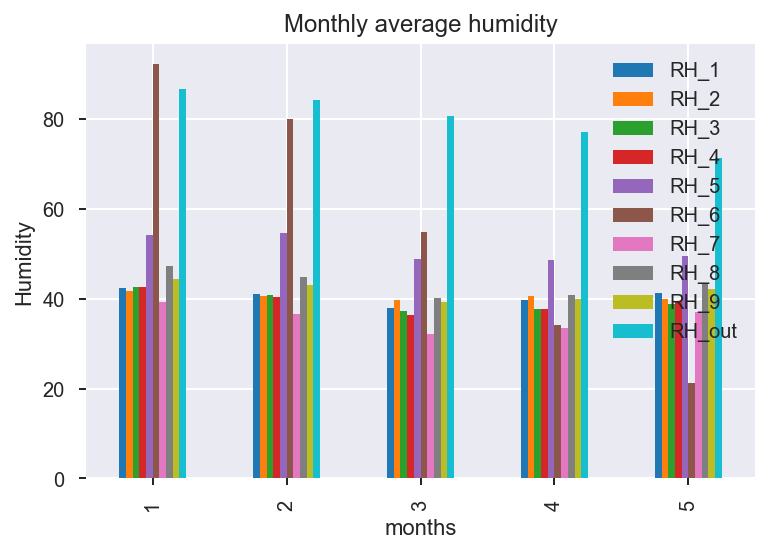

In [108]:
df = data_new.groupby(['months'])[humidity].mean()
df.plot.bar()
plt.ylabel('Humidity')
plt.title("Monthly average humidity")
plt.savefig("./Result/"+"Monthly average humidity")

### The monthly energy consumption is highest in March

In [109]:
#Monthly energy consumption
data_new.groupby(['months'])['Appliances'].apply(lambda x : sum(x))

months
1    283510
2    421550
3    432800
4    427200
5    362950
Name: Appliances, dtype: int64

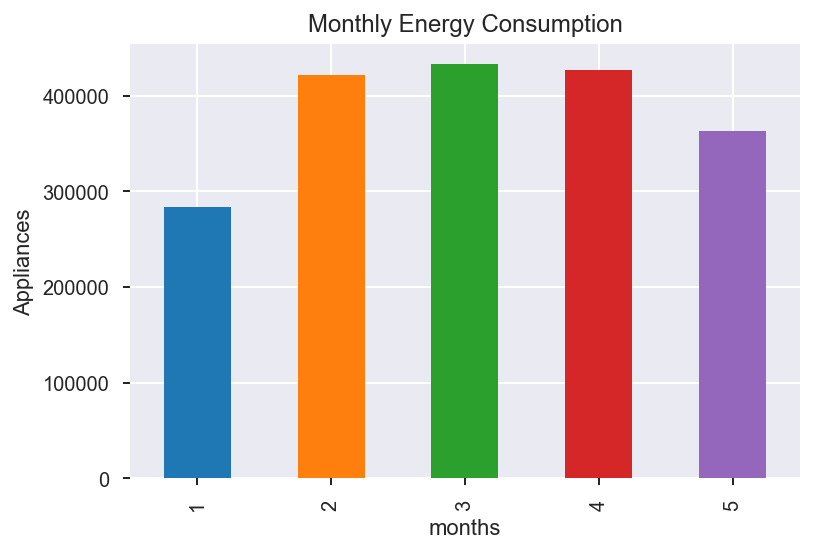

In [110]:
df2 = data_new.groupby(['months'])['Appliances'].sum()
df2.plot.bar()
plt.ylabel('Appliances')
plt.title("Monthly Energy Consumption")
plt.savefig("./Result/"+"Monthly Energy Consumption.png")    

### The hourly energy consumption is highest in evening

In [111]:
# Hourly energy consumption
data_new.groupby(['hour'])['Appliances'].apply(lambda x : sum(x))

hour
0      43390
1      42190
2      40340
3      39650
4      40570
5      43350
6      47440
7      64650
8      87250
9      92710
10    103060
11    109430
12    101630
13    102540
14     89010
15     86990
16     98560
17    133600
18    156670
19    117600
20    104380
21     79320
22     56840
23     46840
Name: Appliances, dtype: int64

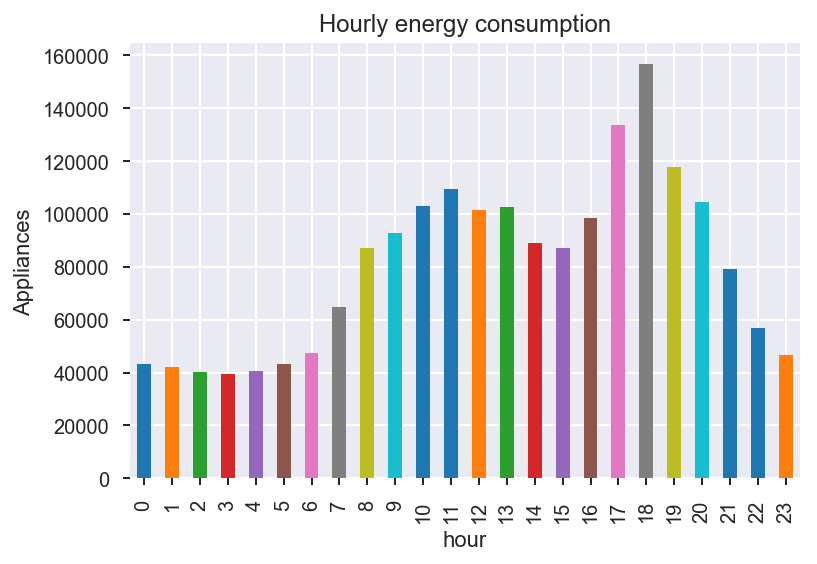

In [112]:
df2 = data_new.groupby(['hour'])['Appliances'].sum()
df2.plot.bar()
plt.ylabel('Appliances')
plt.title("Hourly energy consumption")
plt.savefig("./Result/"+"Hourly energy consumption.png")

## Correlation Analysis

### The function day_visual() shows the relation between any two parameters of a particular day in a month

In [113]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def day_visual(Day,Month, parameter1, parameter2,save):
    new_data = data[(data['date'].map(lambda x: x.day) == Day) & (data['date'].map(lambda x: x.month) == Month)]
    plt.subplot(211)
    title = "Plot of "+parameter1+" and " +parameter2+" vs time"
    plt.title("Plot of "+parameter1+" and " +parameter2+" vs time" ) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter1])
    plt.xlabel("Time") 
    plt.ylabel(parameter1)
    plt.subplot(212) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter2])
    plt.ylabel(parameter2)
    plt.xlabel("Time")
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
    return print("Correlation between ",parameter1," and ",parameter2,"is",str(new_data[parameter1].corr(new_data[parameter2])))
interact(day_visual,Day=day_date,Month=month_date, parameter1 = list(data),parameter2 = list(data), save=save)


interactive(children=(Dropdown(description='Day', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31), value=1), Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameter1', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType', 'TimeDelta'), value='date'), Dropdown(description='parameter2', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType', 'TimeDelta'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

### The function month_visual shows the relation between any two parameters of a particual month

In [114]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def month_visual(Month, parameterx, parametery,save):
    new_data = data[(data['date'].map(lambda x: x.month) == Month)]
    title = "Plot of "+parameterx+" vs " +parametery
    plt.title(title) 
    plt.plot(new_data[parameterx], new_data[parametery])
    plt.xlabel(parameterx) 
    plt.ylabel(parametery)
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(month_visual,Month=month_date, parameterx = list(data),parametery = list(data), save=save)

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameterx', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType', 'TimeDelta'), value='date'), Dropdown(description='parametery', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType', 'TimeDelta'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.month_visual>

### Box Plots

In [115]:
# Version check
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print( __version__) # requires version >= 1.9.0

2.4.1


In [116]:
#plot your graphs offline inside a Jupyter Notebook Environment. First you need to initiate the Plotly Notebook mode as below:
init_notebook_mode(connected=True)
# Run at the start of every ipython notebook to use plotly.offline. This injects the plotly.js source files into the notebook.

In [117]:
import plotly.plotly as py
import plotly.graph_objs as go

In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735,97.695,102.525,10,50,60,100,1080
lights,19735,3.80187,7.93599,0,0,0,0,70
T1,19735,21.6866,1.60607,16.79,20.76,21.6,22.6,26.26
RH_1,19735,40.2597,3.9793,27.0233,37.3333,39.6567,43.0667,63.36
T2,19735,20.3412,2.19297,16.1,18.79,20,21.5,29.8567
RH_2,19735,40.4204,4.06981,20.4633,37.9,40.5,43.26,56.0267
T3,19735,22.2676,2.00611,17.2,20.79,22.1,23.29,29.236
RH_3,19735,39.2425,3.25458,28.7667,36.9,38.53,41.76,50.1633
T4,19735,20.8553,2.04288,15.1,19.53,20.6667,22.1,26.2
RH_4,19735,39.0269,4.34132,27.66,35.53,38.4,42.1567,51.09


### The function box_visual shows the Quartile range and outliers of a particular variable

In [119]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def box_visual(parameter1,save):
    new_data = data
    title = "Box Plot of "+parameter1
    plt.title(title) 
#     plt.figure()
    plt.boxplot(data[parameter1], 0,'gD')
    plt.xlabel(parameter1) 
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(box_visual,Month=month_date, parameter1 = list(data)[1:], save=save)

interactive(children=(Dropdown(description='parameter1', options=('Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType', 'TimeDelta'), value='Appliances'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.box_visual>

### Calculation of Outliers

<p><img alt="" src="./images/OutlierDetection.PNG" /></p>


In [69]:
data = data.drop(data[(data['T1']>25.36) | (data['T1']<18.92)].index)

data = data.drop(data[(data['RH_1']>51.66) | (data['RH_1']<31.59)].index)

data = data.drop(data[(data['T2']>25.56) | (data['T2']<16.08)].index)

data = data.drop(data[(data['RH_2']>51.3) | (data['RH_2']<32.54)].index)

data = data.drop(data[(data['T3']>27.04) | (data['T3']<18.29)].index)

data = data.drop(data[(data['RH_3']>49.05) | (data['RH_3']<32.04)].index)

data = data.drop(data[(data['T4']>25.95) | (data['T4']<16.96)].index)

data = data.drop(data[(data['RH_4']>52.09) | (data['RH_4']<28.90)].index)

data = data.drop(data[(data['T5']>24.13) | (data['T5']<15.93)].index)

data = data.drop(data[(data['RH_5']>66.05) | (data['RH_5']<37.13)].index)

data = data.drop(data[(data['T6']>22.69) | (data['T6']< -4)].index)

data = data.drop(data[(data['RH_6']>163.02) | (data['RH_6']<-23.17)].index)

data = data.drop(data[(data['T7']>25.95) | (data['T7']<15.8)].index)

data = data.drop(data[(data['RH_7']>50.25) | (data['RH_7']<24)].index)

data = data.drop(data[(data['T8']>27.29) | (data['T8']<18.19)].index)

data = data.drop(data[(data['RH_8']>57.73) | (data['RH_8']<31.59)].index)

data = data.drop(data[(data['T9']>24.5) | (data['T9']<15.4)].index)

data = data.drop(data[(data['RH_9']>53.09) | (data['RH_out']<32.66)].index)

data = data.drop(data[(data['T_out']>20.52) | (data['T_out']<-3.07)].index)

data = data.drop(data[(data['Press_mm_hg']>775.93) | (data['Press_mm_hg']<740.93)].index)

data = data.drop(data[(data['RH_out']>123.66) | (data['RH_out']<48.99)].index)

data = data.drop(data[(data['Windspeed']>10.75) | (data['Windspeed']<-1.5)].index)

data = data.drop(data[(data['Visibility']>56.5) | (data['Visibility']<18)].index)

data = data.drop(data[(data['Tdewpoint']>15.06) | (data['Tdewpoint']<-4.76)].index)

data = data.drop(data[(data['rv1']>75.21) | (data['rv1']<-12.58)].index)

data = data.drop(data[(data['rv2']>75.21) | (data['rv2']<-12.58)].index)


In [120]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def box_visual(parameter1,save):
    new_data = data
    title = "Box Plot of "+parameter1
    plt.title(title) 
#     plt.figure()
    plt.boxplot(data[parameter1], 0,'gD')
    plt.xlabel(parameter1) 
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(box_visual,Month=month_date, parameter1 = list(data)[1:], save=save)

interactive(children=(Dropdown(description='parameter1', options=('Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType', 'TimeDelta'), value='Appliances'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.box_visual>

The above plot and table shows the anomalies in our dataset

## Detecting Missing Values

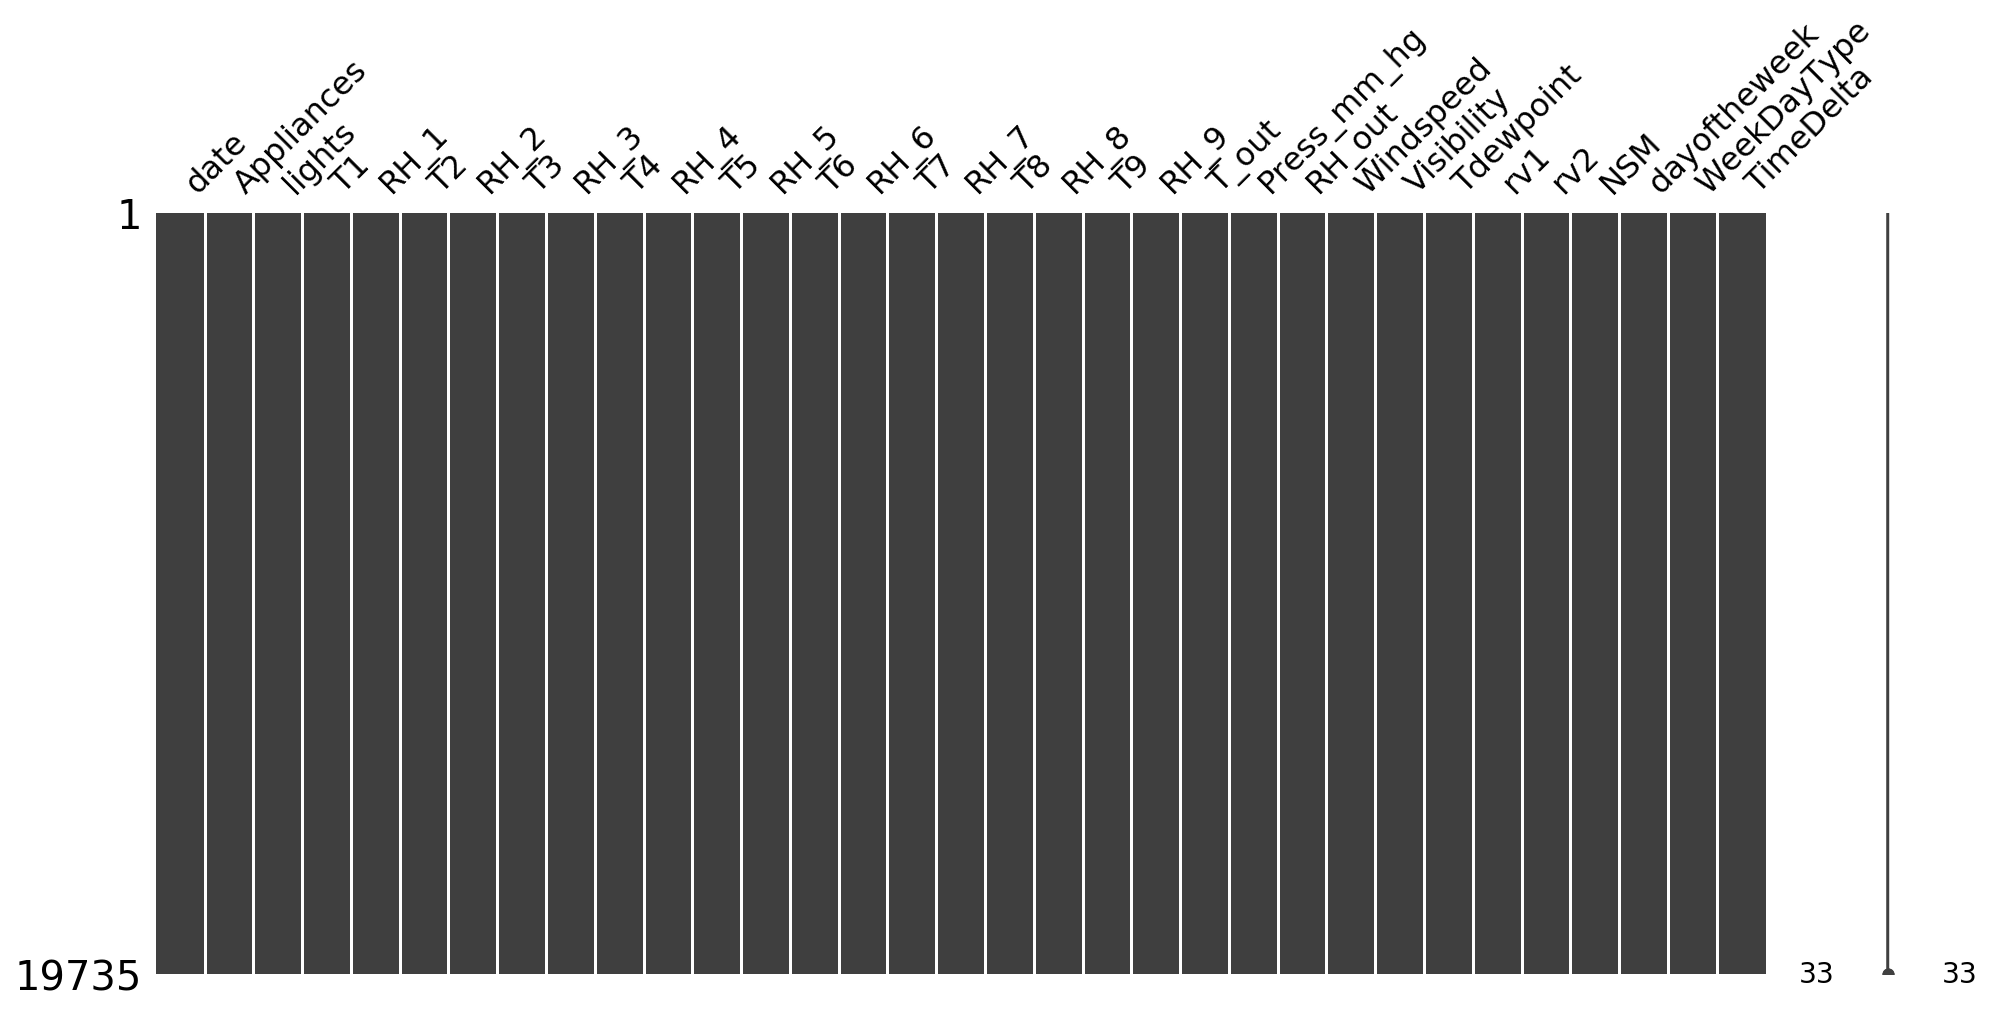

In [53]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Checking any Missing Value ')
try :
    msno.matrix(data, figsize = (16, 7), )
    plt.savefig("./Result/CheckingMissingValue.png")
    
except :
    logging.ERROR("Failed to show the missing plot graph ")  

There is no missing data, the dataset is clean

### Created table using pivottable

In [54]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Creating table using pivottable ')

from pivottablejs import pivot_ui
pivot_ui(data)

### Generating profile report that summarizes the dataset

In [55]:
pandas_profiling.ProfileReport(data)

Number of variables,33
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,5.0 MiB
Average record size in memory,264.0 B
Numeric,25
Categorical,3
Boolean,0
Date,2
Text (Unique),0
Rejected,3
